# TASK 1

In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10



C:\Users\sonal\AppData\Roaming\Python\Python39\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\sonal\AppData\Roaming\Python\Python39\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (


In [2]:
# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Verify the shapes
print("Training data shape:", x_train.shape)
print("Test data shape:", x_test.shape)



170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 33s 0us/step
Training data shape: (50000, 32, 32, 3)
Test data shape: (10000, 32, 32, 3)


In [4]:
# Class labels in CIFAR-10
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']



C:\Users\sonal\AppData\Local\Temp\ipykernel_24584\3101372554.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.title(class_names[int(y_train[i])])


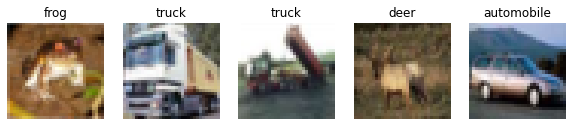

In [5]:
# Display 5 sample images with labels
plt.figure(figsize=(10,5))
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(x_train[i])
    plt.title(class_names[int(y_train[i])])
    plt.axis('off')
plt.show()



In [6]:
# Print unique labels and counts
print("Unique labels:", np.unique(y_train))
print("Number of classes:", len(np.unique(y_train)))

# Normalize pixel values to range [0, 1]
x_train = x_train / 255.0
x_test = x_test / 255.0


Unique labels: [0 1 2 3 4 5 6 7 8 9]
Number of classes: 10


Brief Explanation:

Loaded the CIFAR-10 dataset.

Printed training and test data shapes.

Displayed 5 sample images with their labels.

Normalized image pixel values to [0,1] for faster convergence.



# TASK 2

In [7]:
# Import libraries for building the model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense


In [8]:
# Build the CNN model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.25),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.25),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')  # 10 output classes
])



C:\Users\sonal\anaconda3\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
# Show model summary
model.summary()

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         295,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 315,722 (1.20 MB)

 Trainable params: 315,722 (1.20 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
# Train the model
history = model.fit(x_train, y_train, epochs=15, validation_data=(x_test, y_test))


Epoch 1/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 42s 25ms/step - accuracy: 0.3023 - loss: 1.8768 - val_accuracy: 0.5175 - val_loss: 1.3202
Epoch 2/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 38s 24ms/step - accuracy: 0.4971 - loss: 1.4065 - val_accuracy: 0.5950 - val_loss: 1.1585
Epoch 3/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 38s 24ms/step - accuracy: 0.5436 - loss: 1.2775 - val_accuracy: 0.6172 - val_loss: 1.1214
Epoch 4/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 38s 24ms/step - accuracy: 0.5700 - loss: 1.2027 - val_accuracy: 0.6447 - val_loss: 1.0194
Epoch 5/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 38s 24ms/step - accuracy: 0.5948 - loss: 1.1473 - val_accuracy: 0.6578 - val_loss: 0.9922
Epoch 6/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 38s 24ms/step - accuracy: 0.6119 - loss: 1.1106 - val_accuracy: 0.6648 - val_loss: 0.9709
Epoch 7/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 38s 24ms/step - accuracy: 0.6192 - loss: 1.0788 - val_accuracy: 0.6644 - val_loss: 0.9605
Epoch 8/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 40s 25ms/step - accuracy: 0.6304 -

Brief Explanation for Submission:

Designed a simple CNN model with convolutional, pooling, dropout, and dense layers.

Used Adam optimizer and sparse categorical cross-entropy loss.

Trained the model for 15 epochs.



In [11]:
# Plotting loss and accuracy graphs
plt.figure(figsize=(12,5))



<Figure size 864x360 with 0 Axes>

<Figure size 864x360 with 0 Axes>

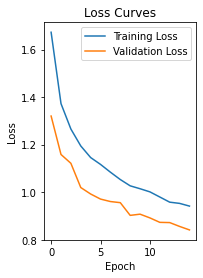

In [12]:
# Plot Loss
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Curves')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()



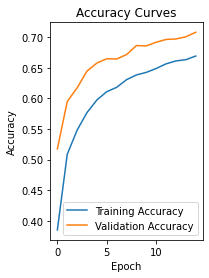

In [13]:
# Plot Accuracy
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Curves')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


Brief Comment:

If training loss decreases while validation loss increases after a point → possible overfitting.

If both losses decrease and accuracy improves → good fit.

Based on the plots, a slight overfitting may be observed after some epochs.



# TASK 3

In [14]:
# Evaluate on test set
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.7088 - loss: 0.8433
Test Accuracy: 0.7081


In [15]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns


In [16]:
# Predict classes
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = y_test.flatten()



313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


In [17]:
# Confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)



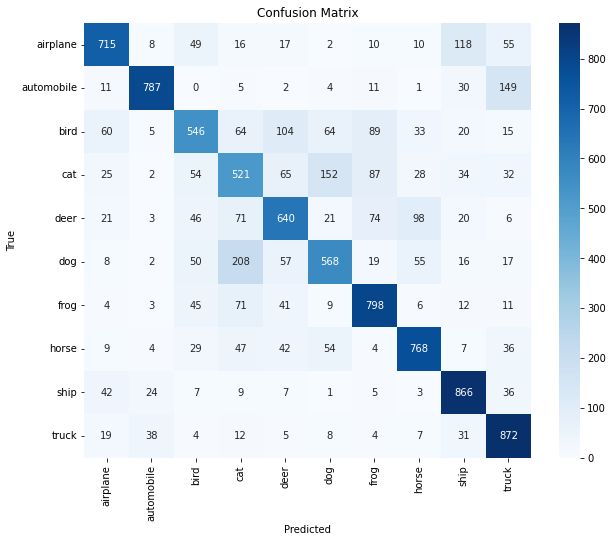

In [18]:
# Plot confusion matrix
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()



In [19]:
# Classification report
print("Classification Report:")
print(classification_report(y_true, y_pred_classes, target_names=class_names))


Classification Report:
              precision    recall  f1-score   support

    airplane       0.78      0.71      0.75      1000
  automobile       0.90      0.79      0.84      1000
        bird       0.66      0.55      0.60      1000
         cat       0.51      0.52      0.51      1000
        deer       0.65      0.64      0.65      1000
         dog       0.64      0.57      0.60      1000
        frog       0.72      0.80      0.76      1000
       horse       0.76      0.77      0.76      1000
        ship       0.75      0.87      0.80      1000
       truck       0.71      0.87      0.78      1000

    accuracy                           0.71     10000
   macro avg       0.71      0.71      0.71     10000
weighted avg       0.71      0.71      0.71     10000



Brief Explanation:

Used confusion matrix and classification report to evaluate detailed performance per class.

Heatmap gives a clear visual of where model confuses classes.



In [20]:
# Correctly classified
correct = np.where(y_pred_classes == y_true)[0]

# Incorrectly classified
incorrect = np.where(y_pred_classes != y_true)[0]



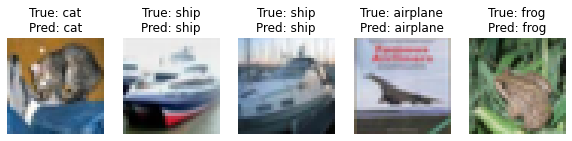

In [21]:
# Plot 5 correctly classified images
plt.figure(figsize=(10,5))
for i, idx in enumerate(correct[:5]):
    plt.subplot(1,5,i+1)
    plt.imshow(x_test[idx])
    plt.title(f"True: {class_names[y_true[idx]]}\nPred: {class_names[y_pred_classes[idx]]}")
    plt.axis('off')
plt.show()



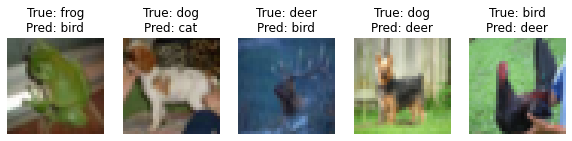

In [22]:
# Plot 5 incorrectly classified images
plt.figure(figsize=(10,5))
for i, idx in enumerate(incorrect[:5]):
    plt.subplot(1,5,i+1)
    plt.imshow(x_test[idx])
    plt.title(f"True: {class_names[y_true[idx]]}\nPred: {class_names[y_pred_classes[idx]]}")
    plt.axis('off')
plt.show()


Brief Explanation:

Displayed examples where the model predicted correctly and where it made mistakes.

Helps visually understand strengths and weaknesses of the model.



# TASK 4

In [23]:
# Build a new model with same architecture
model_sgd = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.25),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.25),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])



C:\Users\sonal\anaconda3\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [24]:
# Compile with SGD optimizer
from tensorflow.keras.optimizers import SGD

model_sgd.compile(optimizer=SGD(learning_rate=0.01, momentum=0.9),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

# Train the model
history_sgd = model_sgd.fit(x_train, y_train, epochs=15, validation_data=(x_test, y_test))


Epoch 1/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 40s 25ms/step - accuracy: 0.2654 - loss: 1.9722 - val_accuracy: 0.4828 - val_loss: 1.4708
Epoch 2/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 36s 23ms/step - accuracy: 0.4579 - loss: 1.4960 - val_accuracy: 0.5501 - val_loss: 1.2563
Epoch 3/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 35s 22ms/step - accuracy: 0.5068 - loss: 1.3762 - val_accuracy: 0.5833 - val_loss: 1.1972
Epoch 4/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 38s 24ms/step - accuracy: 0.5366 - loss: 1.3084 - val_accuracy: 0.6122 - val_loss: 1.1310
Epoch 5/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 39s 25ms/step - accuracy: 0.5583 - loss: 1.2509 - val_accuracy: 0.6166 - val_loss: 1.1040
Epoch 6/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 38s 24ms/step - accuracy: 0.5729 - loss: 1.2063 - val_accuracy: 0.6448 - val_loss: 1.0431
Epoch 7/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 39s 25ms/step - accuracy: 0.5860 - loss: 1.1729 - val_accuracy: 0.6432 - val_loss: 1.0203
Epoch 8/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 39s 25ms/step - accuracy: 0.5947 -

Brief Explanation:

Changed optimizer from Adam to SGD (with momentum).

Trained again for 15 epochs to compare performance.



Brief Explanation:

Adam usually converges faster than SGD.

SGD might perform better in some cases after tuning learning rate/momentum.

